In [2]:
from utils import *
from fastai2.vision.widgets import *
from fastai.imports import *

In [5]:
path = Path('/storage/data/pinaki/tennis')

In [6]:
strokes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = strokes.dataloaders(path)

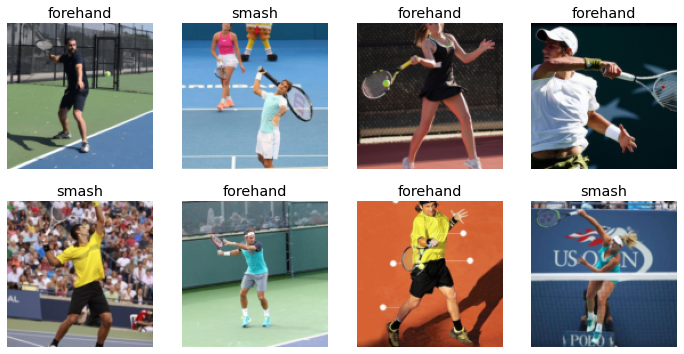

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

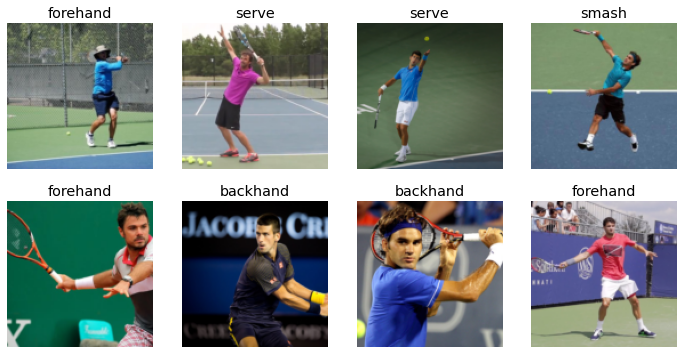

In [9]:
dls.train.show_batch(max_n=8, nrows=2)

In [49]:
dls.train.dataset[99]

(PILImage mode=RGB size=835x577, TensorCategory(1))

In [10]:
strokes = strokes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = strokes.dataloaders(path)

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,time
0,2.421530,2.763572,0.720339,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.874165,1.664146,0.627119,00:06
1,1.700173,1.199445,0.466102,00:06
2,1.522373,1.056564,0.372881,00:05
3,1.368761,0.989959,0.372881,00:06
4,1.199781,0.940287,0.347458,00:05
5,1.078293,0.956930,0.296610,00:05
6,0.949115,0.988068,0.313559,00:05
7,0.840731,1.029549,0.305085,00:06
8,0.746572,1.048450,0.305085,00:06
9,0.664771,1.074302,0.313559,00:06


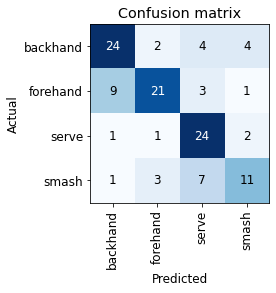

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

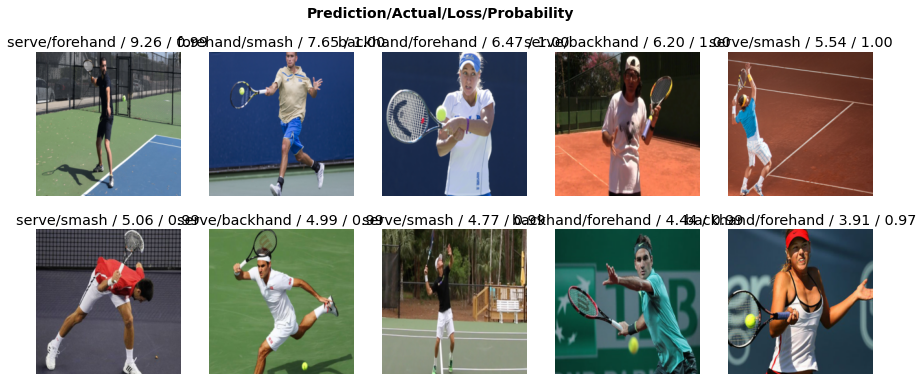

In [13]:
interp.plot_top_losses(10, nrows=2)